In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [3]:
# txt to csv
df= pd.read_csv('stock dataset.txt')
df.to_csv('stock dataset.txt', index= None)

In [43]:
df.tail(12)

,Date,Open,High,Low,Close,Volume,OpenInt,forecast_arima
1553,2017-10-26,57.5800,57.6500,57.0201,57.0500,31175,0,37.652826
1554,2017-10-27,56.9700,57.3200,56.8901,57.1900,20042,0,37.652826
1555,2017-10-30,57.2400,57.3100,56.8700,57.1300,23671,0,37.652826
1556,2017-10-31,57.1577,57.5100,57.0100,57.5000,40906,0,37.652826
1557,2017-11-01,57.9700,57.9790,57.4600,57.4600,33382,0,37.652826
1558,2017-11-02,57.5200,57.5200,56.9332,57.0900,24362,0,37.652826
1559,2017-11-03,56.9500,57.3090,56.8800,57.1400,70672,0,37.652826
1560,2017-11-06,57.6100,57.7372,57.2285,57.6500,41601,0,37.652826
1561,2017-11-07,57.2900,57.3460,57.1446,57.2850,50935,0,NaN
1562,2017-11-08,57.3100,57.5500,57.2200,57.4900,71770,0,NaN


In [5]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0
mean,36.014550,36.137120,35.855319,35.987517,6452.979553,0.0
std,6.957747,7.002548,6.878264,6.933814,12047.101114,0.0
min,23.936000,23.946000,23.867000,23.946000,2.000000,0.0
25%,29.829000,29.966000,29.819000,29.862000,529.000000,0.0
50%,36.512000,36.571000,36.322000,36.464000,1559.000000,0.0
75%,38.957000,39.123000,38.787000,38.838000,5993.000000,0.0
max,58.620000,58.720000,57.700000,58.430000,106139.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1565 non-null   object 
 1   Open     1565 non-null   float64
 2   High     1565 non-null   float64
 3   Low      1565 non-null   float64
 4   Close    1565 non-null   float64
 5   Volume   1565 non-null   int64  
 6   OpenInt  1565 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 85.7+ KB


In [46]:
df.shape

(1565, 8)

In [7]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [8]:
from datetime import datetime
df['Date']
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.index

RangeIndex(start=0, stop=1565, step=1)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [11]:
# date as index
df2 = df.set_index('Date')

df2.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2010-07-21,24.333,24.333,23.946,23.946,43321,0
2010-07-22,24.644,24.644,24.362,24.487,18031,0
2010-07-23,24.759,24.759,24.314,24.507,8897,0
2010-07-26,24.624,24.624,24.449,24.595,19443,0
2010-07-27,24.477,24.517,24.431,24.517,8456,0


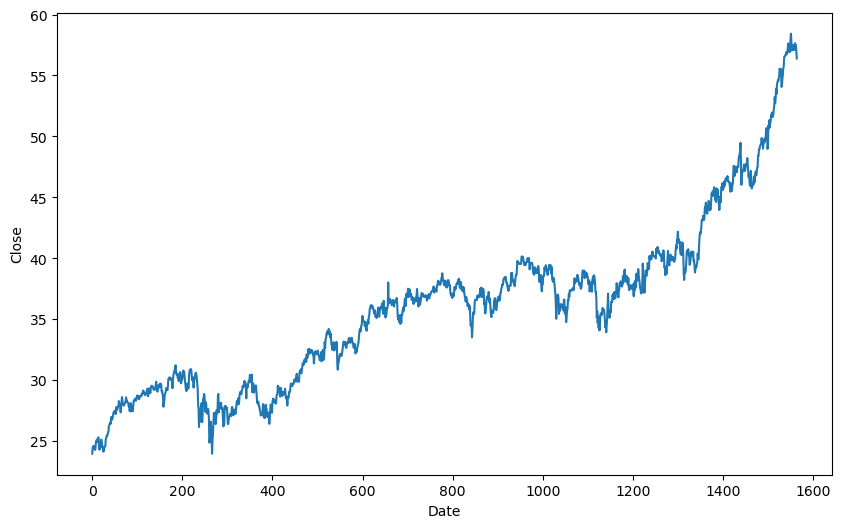

In [12]:
# plot close price
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.show()

Conclusion: Here we see that it seems like data could be described using additive model, as the fluctuations are roughly constant over size.

<AxesSubplot:ylabel='Density'>

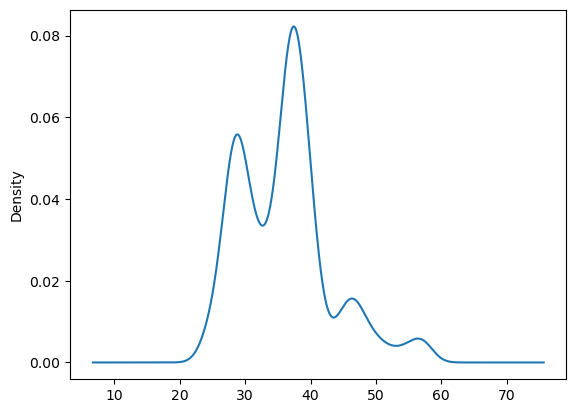

In [13]:
# Distribution of the dataset
df2_Close= df2['Close']
df2_Close.plot(kind='kde')

#checking stationarity of give dataset

H0: Time Series is not stationary

H1: Time Series is  stationary

In [14]:
from statsmodels.tsa.stattools import adfuller
x = df2['Close'].values
result = adfuller(x)
print('Pvalue : ', round(result[1],3))
print('ADF Statistics:', round(result[0],3))
for key, value in result[4].items():
    print('\t:',key,value)

Pvalue :  0.99
ADF Statistics: 0.732
	: 1% -3.4345487774977768
	: 5% -2.8633945067663817
	: 10% -2.5677573081032214


Conclusion: As p value >0.05 we do not reject null hypothesis.

Interpretation: Time series is not stationary

### Decomposition of series

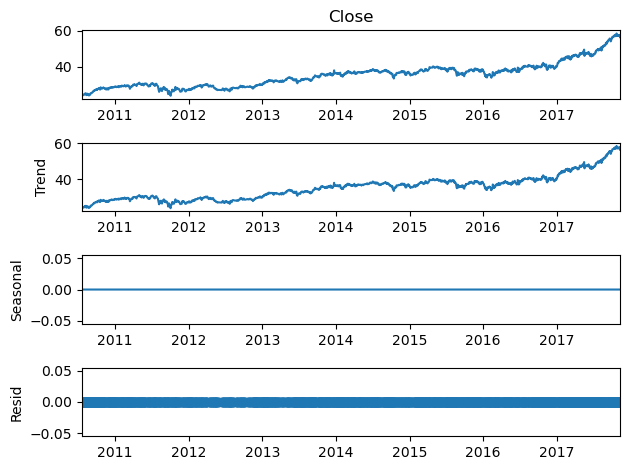

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(df2_Close, model='additive',period=1).plot();

Conclusion: Plot shows observed series, the smoothed trend line, the seasonal pattern and random part of the series. 

### Making The series Stationary

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    
    plt.figure(figsize=(16,7))
    fig= plt.figure(1)

    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    df2test = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    df2output = pd.Series(df2test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df2test[4].items():
        df2output['Critical Value (%s)'%key] = value
    pvalue = df2test[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(df2output)

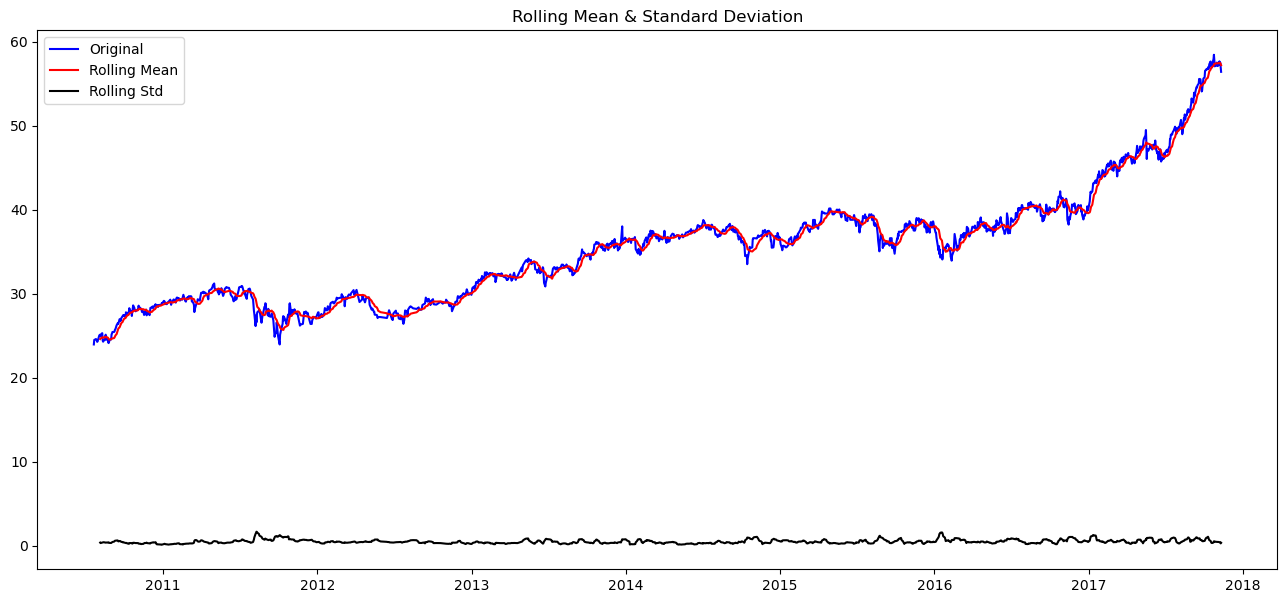

Results of Dickey-Fuller Test:
p-value = 0.9905. The series is likely non-stationary.
Test Statistic                    0.732068
p-value                           0.990457
#Lags Used                        4.000000
Number of Observations Used    1560.000000
Critical Value (1%)              -3.434549
Critical Value (5%)              -2.863395
Critical Value (10%)             -2.567757
dtype: float64


In [17]:
test_stationarity(df2['Close'])

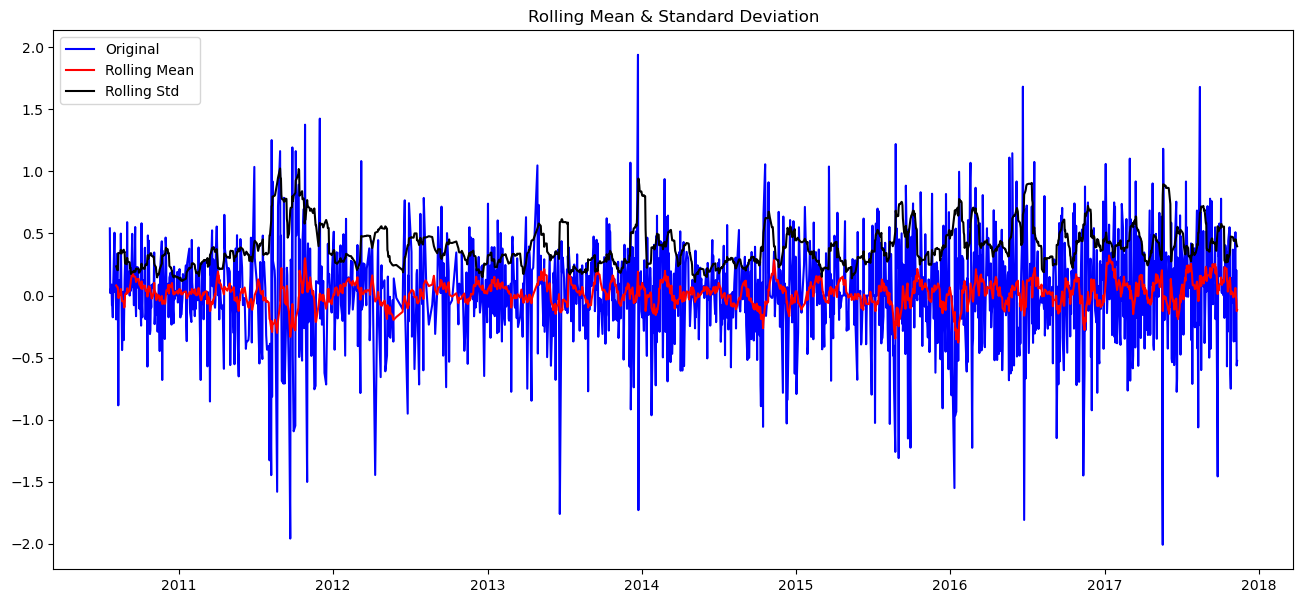

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -22.692933
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    1560.000000
Critical Value (1%)              -3.434549
Critical Value (5%)              -2.863395
Critical Value (10%)             -2.567757
dtype: float64


In [18]:
df2['close_diff'] = df2['Close'] - df2['Close'].shift()
test_stationarity(df2['close_diff'].dropna())

### Fitting the Auto Arima model

In [19]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.model_selection import train_test_split as split
modelling_series = df['Close']
train,test = split(modelling_series,train_size=0.70,shuffle=False)

In [96]:
from pmdarima import auto_arima
autoarima=auto_arima(train, start_p=0,start_q=0,test='adf',max_p=3, max_q=3,d=None, seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',suPpress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1027.131, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1021.428, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.993, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1026.451, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1010.110, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1011.995, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1011.995, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1014.521, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1017.014, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1014.003, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1010.792, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.652 seconds


In [125]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,1,1))
fit= model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1095
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -502.396
Date:                Mon, 26 Jun 2023   AIC                           1010.792
Time:                        14:28:54   BIC                           1025.785
Sample:                             0   HQIC                          1016.466
                               - 1095                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6455      0.100      6.429      0.000       0.449       0.842
ma.L1         -0.7484      0.088     -8.519      0.000      -0.921      -0.576
sigma2         0.1467      0.004     37.591      0.0

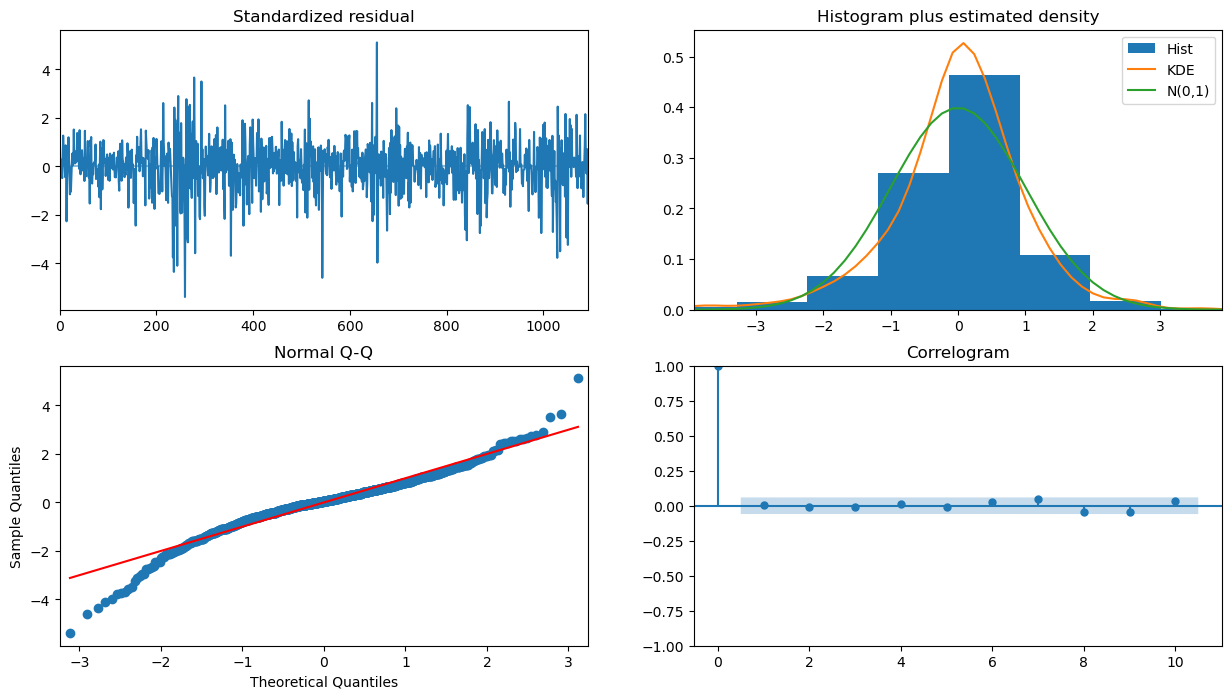

In [126]:
autoarima.plot_diagnostics(figsize=(15,8))
plt.show()

Conclusion: Above autoarima gives arima model of order(1,0,1) also diagnostic plot shows that,
    Top Left    :  The residual errors appear to have a uniform variance and fluctuate around mean of zero 
    Top Right   :  The density plot on the top right suggest normal distribution with mean zero.
    Bottom Left :  The almost all points are on the straight line suggesting normal distribution.
    Bottom Right:  The residual errors are not autocorrelated.

In [127]:
df['forecast_arima'] = fit.predict(start = 1500, end = 1600);df['forecast_arima'].tail(20)


1545    38.603896
1546    38.603896
1547    38.603896
1548    38.603896
1549    38.603896
1550    38.603896
1551    38.603896
1552    38.603896
1553    38.603896
1554    38.603896
1555    38.603896
1556    38.603896
1557    38.603896
1558    38.603896
1559    38.603896
1560    38.603896
1561    38.603896
1562    38.603896
1563    38.603896
1564    38.603896
Name: forecast_arima, dtype: float64

<AxesSubplot:>

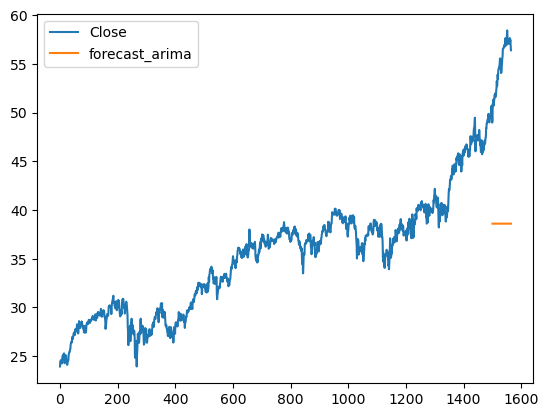

In [128]:
df[['Close','forecast_arima']].plot()